#### 1. Яндекс отслеживает количество удачных постов определённого блога для Дзена. Абсолютно удачным постом считается такой, у которого число репостов сравнимо с числом лайков. Этот успех считаем за 100%.

Сгенерируйте 20, 400, 10000 случайных целых чисел из отрезка [1, 100]. Это соотношение репостов к лайкам в популяции блогеров в целом. Если для избранного блогера соотношение всегда выше, он причисляется к хорошим.
Для каждого набора чисел вычислите вероятность события «Сгенерированное число лежит в отрезке [21, 40]» (самая типичная доля репостов). Сохраните её в переменных p_20, p_400 и p_10000 соответственно.
Для вычисления вероятности напишите функцию calculate_p которая принимает в качестве параметра количество случайных чисел из отрезка [1, 100], а на выходе передаёт долю тех чисел, которые находятся в отрезке от 21 до 40 включительно.

In [1]:
from random import randint

In [2]:
def calculate_p(n):
    rep_num = [randint(1, 101) for x in range(1, n + 1)] 
    good_rep = [x for x in rep_num if x >= 21 and x <= 40]
    probability = len(good_rep) / len(rep_num)
    return probability

In [3]:
p_20 = calculate_p(20)
p_400 = calculate_p(400)
p_10000 = calculate_p(10000)

print(p_20, p_400, p_10000)

0.25 0.19 0.1955


#### 2. Ваша компания устраивает важное мероприятие. Пиарщики ищут хотя бы шесть инфопартнёров, чтобы обеспечить освещение этого события. По опыту, соглашается примерно одно из пяти медиа, с которыми начинаются переговоры. Постройте распределения вероятностей и гистограммы для случайной величины «количество инфопартнёров», если вы начали переговоры с 30 медиа.

In [5]:
from math import factorial
from matplotlib import pyplot as plt

<BarContainer object of 31 artists>

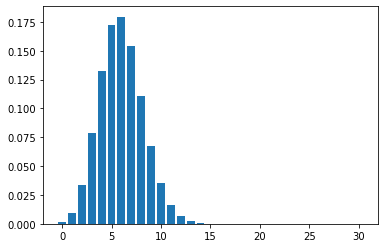

In [7]:
p = 0.2  # какова вероятность заключить контракт?
n = 30  # со сколькими компаниями начинаем переговоры?

distr = [] # переменную, в которой будете хранить значения распределения

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

#### 3. Постройте распределения вероятностей и гистограммы для случайной величины «количество инфопартнёров», если вы начали переговоры с 60 медиа.

<BarContainer object of 61 artists>

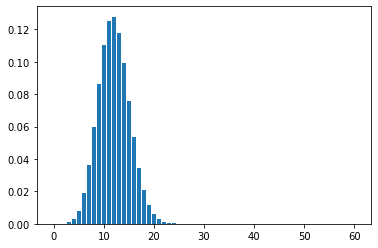

In [8]:
p = 0.2  # какова вероятность заключить контракт?
n = 60  # со сколькими компаниями начинаем переговоры?

distr = [] # переменную, в которой будете хранить значения распределения

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

#### 4. Количество посетителей сайта интернет-издания «Кукуруза» за месяц распределено нормально со средним, равным 100500 человек, и стандартным отклонением в 3500 человек.Рекламодатель, заказавший рекламу, настоял на штрафе, если материал посмотрит меньше 92000 посетителей. Его желание понятно: никто не хочет переплачивать, если охват будет не такой большой, как хотелось. В ответ менеджер сайта предложил включить в договор бонус, если материал посмотрит более 111000 человек.Предположим, что дополнительных действий по привлечению трафика запланировано не было. Найдите вероятность того, что сайт интернет-издания за следующую неделю посетит: а) менее 92000 человек; б) более 111000 человек.

In [9]:
from scipy import stats as st

In [10]:
mu = 100500
sigma = 3500

bonus_threshold = 111000
fail_threshold = 92000

In [15]:
distr = st.norm(mu, sigma)  #задаем нормальное распределние

p_fail = distr.cdf(fail_threshold)
p_bonus = 1 - distr.cdf(bonus_threshold)  #Метод st.norm.cdf() выдаёт вероятность получить значение, которое <= заданному.

print('Вероятность бонуса', p_bonus)
print('Вероятность штрафа', p_fail)

Вероятность бонуса 0.0013498980316301035
Вероятность штрафа 0.0075792194387197245


#### 5. Интернет-магазин «Супервип» продаёт сувенирную продукцию для узкой аудитории корпоративных клиентов. Продажи премиальных шахмат из хрусталя за неделю распределены нормально со средним значением 420 и стандартным отклонением 65.
Сколько отделу закупок нужно заказать хрустальных шахмат, чтобы продать их все на следующей неделе с вероятностью 90%? Склад перед поставкой на следующую неделю будет уже пуст.

In [19]:
mu = 420
sigma = 65

distr = st.norm(mu, sigma)

prob = 1 - 0.9

chess_count = distr.ppf(prob)
print('нужно заказать', chess_count)

нужно заказать 336.69914823960096


#### 6. В интернет-магазине «Вазон» пользователи делают заказы, стоимости которых распределены нормально со средним 2400 руб. и стандартным отклонением 320 руб.
Бóльшая часть покупателей выбирает доставку курьером, на которую нужно установить фиксированную цену независимо от суммы заказа.
Если верить исследованию, пользователи расстраиваются, когда стоимость доставки больше или равна половине стоимости заказа. Сколько должна стоить курьерская доставка, чтобы для ³⁄₄ заказов она не превышала половины цены?

In [20]:
mu = 2400
sigma = 320

distr = st.norm(mu, sigma)

threshold = 0.25

max = distr.ppf(threshold) / 2
print(max)

1092.0816399686269


#### 7. Компания делает ежемесячную рассылку по базе клиентов — в ней новости и предложения от партнёров. Известно, что рассылку открывают 40% получателей.
Один партнёр спланировал рекламную кампанию и рассчитывает на охват в 9 тысяч пользователей. Посчитайте, с какой вероятностью ожидания клиента будут оправданы, если сделать рассылку на 23 тысячи человек. Выведите значение p_threshold на экран.

In [24]:
binom_n = 23000 #  целевое количество человек в рассылке
binom_p = 0.4 # сколько пользователей открывают рассылку?

threshold = 9000   # на какой охват сейчас рассчитывают?

mu = binom_n * binom_p  # чему равно среднее значение распределения
sigma = (binom_n * binom_p * (1 - binom_p)) ** 0.5 # чему равно стандартное отклонение распределения

p_threshold = 1 - st.norm(mu, sigma).cdf(threshold)
print(p_threshold)

0.9964477890716447
